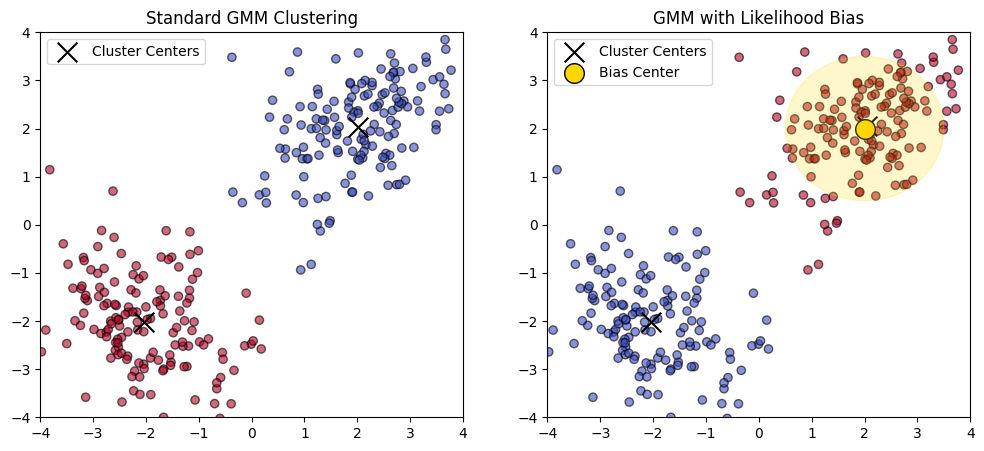

In [4]:
# Fix the syntax error and re-run the simulation

# Workaround: Duplicate samples in the biased region to simulate likelihood boost

# Find indices of points inside the bias region
biased_indices = np.where(distances < r_bias)[0]

# Duplicate these points to artificially increase their influence
X_biased = np.vstack((X, X[biased_indices]))

# Fit GMM on the modified dataset
gmm_biased = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_biased.fit(X_biased)
labels_biased = gmm_biased.predict(X)

# Plot Results Again
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Standard GMM Clustering
ax[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', alpha=0.6, edgecolors='k')
ax[0].scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=200, c='black', label='Cluster Centers')
ax[0].set_title("Standard GMM Clustering")

# Biased GMM Clustering
ax[1].scatter(X[:, 0], X[:, 1], c=labels_biased, cmap='coolwarm', alpha=0.6, edgecolors='k')
ax[1].scatter(gmm_biased.means_[:, 0], gmm_biased.means_[:, 1], marker='x', s=200, c='black', label="Cluster Centers")
ax[1].scatter(center[0], center[1], marker='o', s=200, c='gold', label="Bias Center", edgecolors='black')
circle = plt.Circle(center, r_bias, color='gold', alpha=0.2)
ax[1].add_patch(circle)
ax[1].set_title("GMM with Likelihood Bias")

for a in ax:
    a.set_xlim(-4, 4)
    a.set_ylim(-4, 4)
    a.legend()

plt.show()
